<a href="https://colab.research.google.com/github/ms9975/ksnu_bdna_ms_2022/blob/main/%EA%B9%80%EB%AF%BC%EC%84%B111%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 26.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4e75b61b1cbe60321e1aa0bed1263ff81d41b66ddf63665e505dbf2a3d030c42
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [8]:
import mglearn

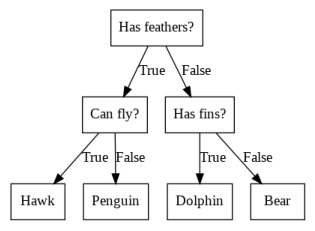

In [9]:
mglearn.plots.plot_animal_tree()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [11]:
import numpy as np

In [12]:
cancer=load_breast_cancer()

In [13]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [14]:
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.937


In [16]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [17]:
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [18]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test,y_test)))

Training Accuracy: 0.988
Test Accuracy: 0.951


In [19]:
from sklearn.tree import export_graphviz
import graphviz

In [20]:
export_graphviz(tree,out_file='tree.dot',class_names=["0","1"])

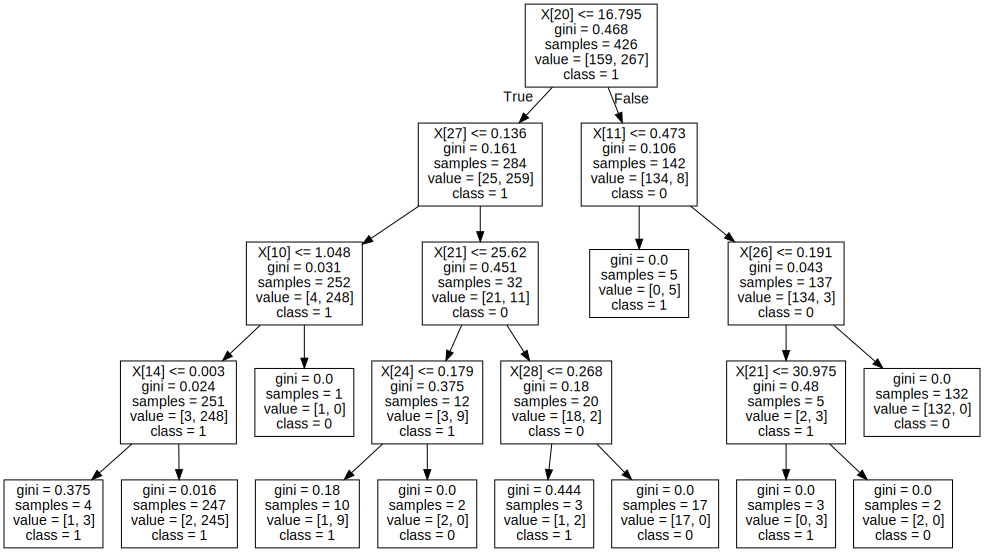

In [21]:
with open("tree.dot") as f:
  dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [27]:
import matplotlib.pyplot as plt


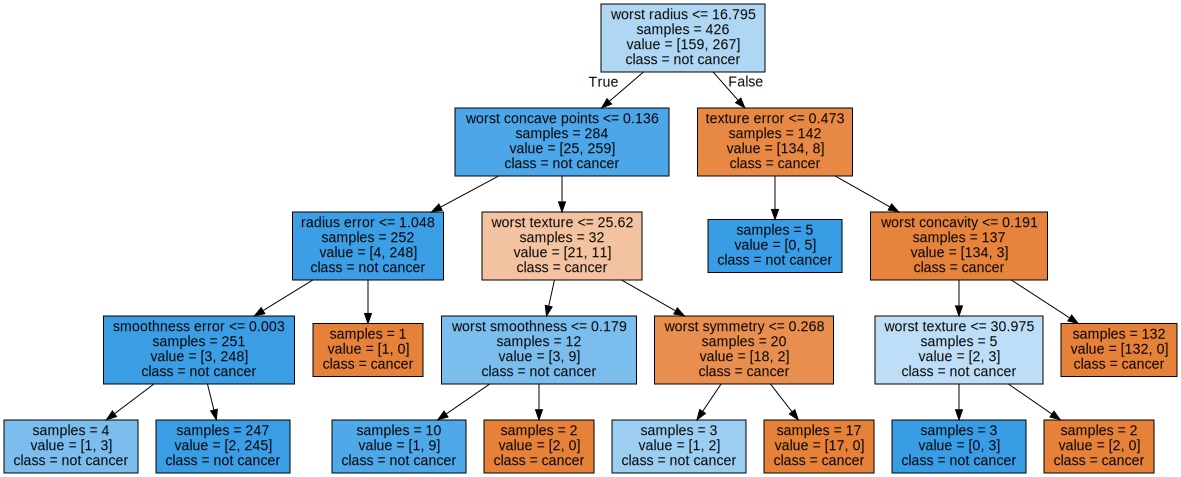

In [28]:
with open('tree.dot') as f:
  dot_graph=f.read()
display(graphviz.Source(dot_graph))
export_graphviz(tree, out_file="tree.dot",feature_names=cancer.feature_names, class_names=["cancer","not cancer"], filled=True, impurity=False)
plt.show()

In [40]:
print("Feature Importance: \n",tree.feature_importances_)

Feature Importance: 
 [5.38673094e-02 3.07987025e-03 1.15002550e-02 5.35548899e-06
 2.80218433e-02 5.89602504e-01 1.46540354e-02 7.41278530e-02
 8.38472245e-04 5.89594103e-03 8.71538881e-03 1.02314813e-02
 1.99459691e-01]


In [30]:
import matplotlib.pyplot as plt

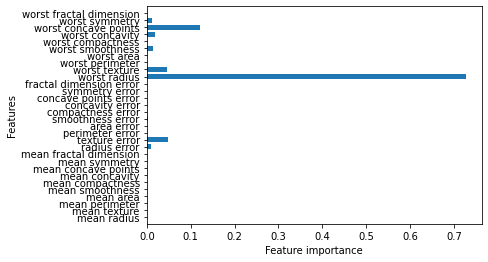

In [31]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [32]:
from sklearn.datasets import load_boston

In [33]:
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,random_state=42)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
tree=DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

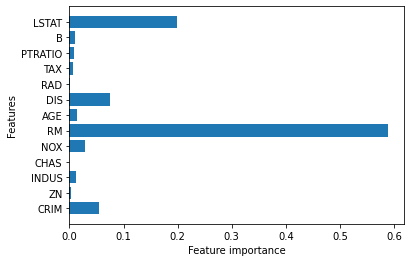

In [37]:
n_features=boston.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [38]:
from inspect import Attribute

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.datasets import make_moons

In [43]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [44]:
forest=RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [45]:
print('Training Accuracy: {:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy: 0.973
Test Accuracy: 0.920


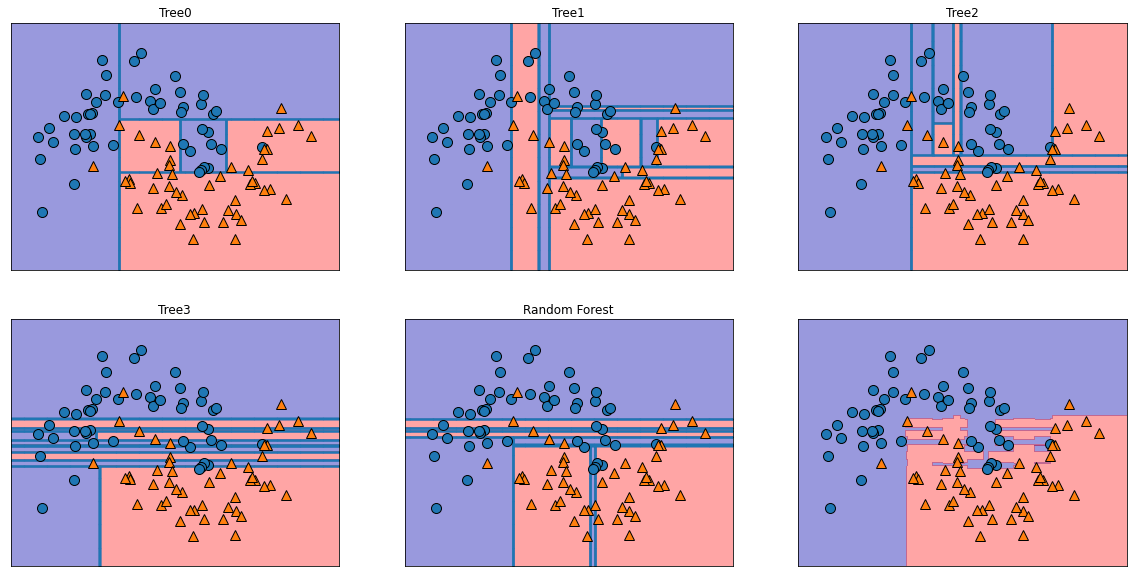

In [52]:
fig, axes=plt.subplots(2,3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
   
mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

In [53]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
print('Training Accuracy: {:.3f}'.format(forest.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(forest.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.951


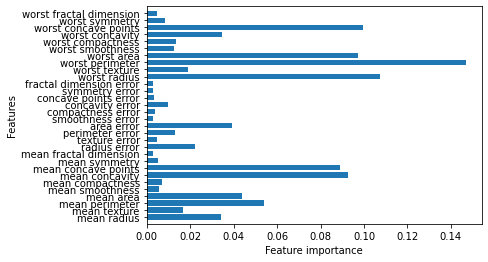

In [72]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),forest.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gb=GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print('Training Accuracy: {:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.958


In [59]:
gb=GradientBoostingClassifier(max_depth=1,random_state=0)
gb.fit(X_train,y_train)
print('Training Accuracy: {:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(gb.score(X_test,y_test)))

Training Accuracy: 0.995
Test Accuracy: 0.965


In [60]:
gb=GradientBoostingClassifier(max_depth=4,learning_rate=0.01,n_estimators=300,random_state=0)
gb.fit(X_train,y_train)
print('Training Accuracy: {:.3f}'.format(gb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.944


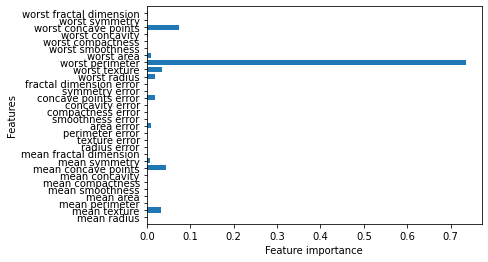

In [62]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),gb.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()

In [70]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('Training Accuracy: {:.3f}'.format(xgb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(xgb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.965


In [71]:
xgb=XGBClassifier(max_depth=4,learning_rate=0.01,n_estimators=100,random_state=0)
xgb.fit(X_train,y_train)
print('Training Accuracy: {:.3f}'.format(xgb.score(X_train,y_train)))
print('Test Accuracy: {:.3f}'.format(xgb.score(X_test,y_test)))

Training Accuracy: 0.998
Test Accuracy: 0.937


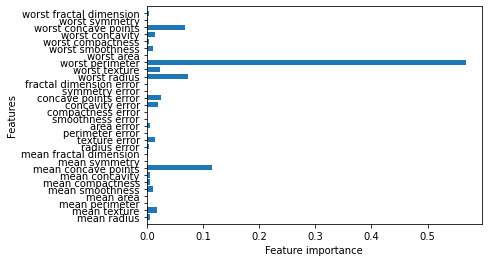

In [73]:
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),xgb.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)
plt.show()